In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.datasets import load_digits
from sklearn import preprocessing,linear_model
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn


## Loading DataSet

In [3]:
training = pd.read_csv("train.csv")


## Exploring data:
Data from Kaggel:
    [data](https://www.kaggle.com/c/digit-recognizer/data)

In [4]:
training.shape

(42000, 785)

In [7]:
images = training.iloc[0:5000 , 1:]
labels = training.iloc[0:5000 , 0]

## Splitting Data 

In [8]:
images_train, images_test, labels_train,labels_test = train_test_split(images,labels,test_size = 0.2)


In [9]:
images_train.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
2596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4288,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
920,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4129,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Visualizing Digits:

Text(0.5, 1.0, '9')

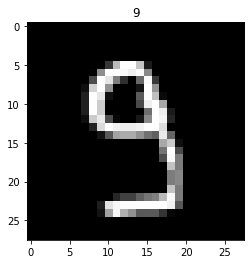

In [14]:
i=5
img=images_train.iloc[i].to_numpy()
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(labels_train.iloc[i])


## 1. Using Logistic Regression to predict one digit:

In [17]:
labels_train5 = (labels_train == 5)
labels_test5 = (labels_test == 5)


In [20]:
model = LogisticRegression(max_iter=10000)
model.fit(images_train,labels_train5)
predicted = model.predict(images_test)

## 2. Confusion Matrix

In [28]:
cm = confusion_matrix(labels_test5, predicted)
cm

array([[870,  37],
       [ 26,  67]], dtype=int64)

Text(33.0, 0.5, 'truth')

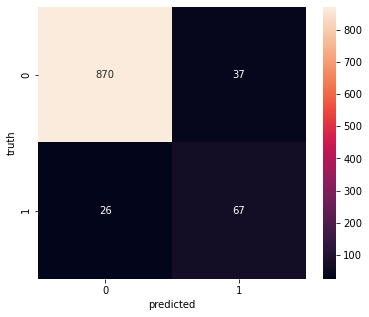

In [29]:
plt.figure(figsize=(6,5))
sn.heatmap(cm,annot= True,fmt="d")
plt.xlabel('predicted')
plt.ylabel('truth')

## Accuracy

In [31]:
accuracy_score(labels_test5, predicted)

0.937

## 3. Logistic regrission to classify the 10 digits (Multiclassification):
    

In [32]:
model.fit(images_train, labels_train)

LogisticRegression(max_iter=10000)

In [33]:
results =model.predict(images_test)

In [36]:
cm2 = confusion_matrix(labels_test, results)
cm2

array([[ 88,   0,   0,   0,   0,   1,   1,   0,   2,   0],
       [  0, 111,   0,   1,   0,   2,   1,   0,   3,   0],
       [  1,   0,  94,   1,   0,   1,   1,   1,   4,   1],
       [  1,   1,   4,  67,   0,   3,   0,   0,   3,   2],
       [  0,   0,   1,   0,  90,   0,   1,   1,   0,   4],
       [  1,   0,   2,   6,   2,  73,   2,   1,   3,   3],
       [  4,   1,   0,   1,   1,   1, 110,   0,   2,   1],
       [  0,   1,   0,   0,   2,   0,   0,  85,   1,   8],
       [  0,   2,   2,   7,   1,   6,   1,   0,  73,   1],
       [  2,   1,   0,   2,   3,   2,   0,   1,   0,  93]], dtype=int64)

Text(69.0, 0.5, 'truth')

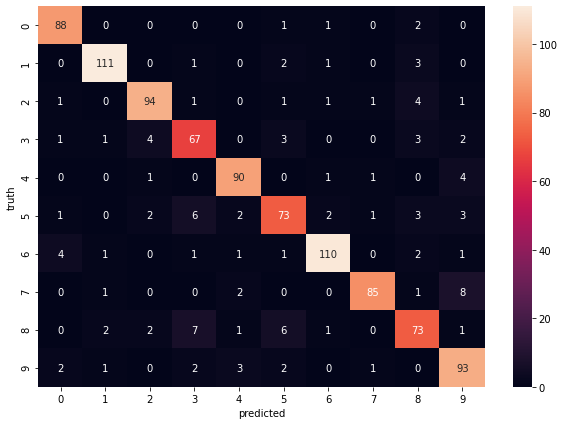

In [37]:
plt.figure(figsize=(10,7))
sn.heatmap(cm2,annot= True,fmt="d")
plt.xlabel('predicted')
plt.ylabel('truth')

In [38]:
accuracy_score(labels_test,results)

0.884